In [1]:
import sqlite3
import pandas as pd
import numpy as np

In [2]:
con = sqlite3.connect("database.sqlite")
data_country = pd.read_sql_query("SELECT * from Country", con)
data_league = pd.read_sql_query("SELECT * from League", con)
data_match = pd.read_sql_query("SELECT * from Match", con)
data_player = pd.read_sql_query("SELECT * from Player", con)
data_player_att = pd.read_sql_query("SELECT * from Player_Attributes", con)
data_team = pd.read_sql_query("SELECT * from Team", con)
data_team_att = pd.read_sql_query("SELECT * from Team_Attributes", con)


# DATA PREPROCESSING

### NOTES
- home_player_1 is the id of one of the players
- The last few variables with the codes follow the convention:
    - ___H = ___ home win odds
    - ___D = ___ draw win odds
    - ___A = ___ away win odds
    - where ___ is a betting platform
- (home_player_X1, home_player_Y1) is the coordinate of player 1's position from the home team

In [3]:
count = 0
for colname in data_match.columns:
#     print(count)
    count +=1
    print(colname)

id
country_id
league_id
season
stage
date
match_api_id
home_team_api_id
away_team_api_id
home_team_goal
away_team_goal
home_player_X1
home_player_X2
home_player_X3
home_player_X4
home_player_X5
home_player_X6
home_player_X7
home_player_X8
home_player_X9
home_player_X10
home_player_X11
away_player_X1
away_player_X2
away_player_X3
away_player_X4
away_player_X5
away_player_X6
away_player_X7
away_player_X8
away_player_X9
away_player_X10
away_player_X11
home_player_Y1
home_player_Y2
home_player_Y3
home_player_Y4
home_player_Y5
home_player_Y6
home_player_Y7
home_player_Y8
home_player_Y9
home_player_Y10
home_player_Y11
away_player_Y1
away_player_Y2
away_player_Y3
away_player_Y4
away_player_Y5
away_player_Y6
away_player_Y7
away_player_Y8
away_player_Y9
away_player_Y10
away_player_Y11
home_player_1
home_player_2
home_player_3
home_player_4
home_player_5
home_player_6
home_player_7
home_player_8
home_player_9
home_player_10
home_player_11
away_player_1
away_player_2
away_player_3
away_player_4
a

In [4]:
# Start by dropping all the stuff in xtml form
match = data_match.drop(['goal', 'shoton', 'shotoff', 'foulcommit', 'card', 'cross', 'corner', 'possession'], axis = 1)
match

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,25975,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992091,10190,10191,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25975,25976,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992092,9824,10199,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25976,25977,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992093,9956,10179,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25977,25978,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992094,7896,10243,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Look for all columns with too many NA
nan_counts = match.isna().sum(axis=0)
nan_counts = pd.DataFrame({'nan_perc': nan_counts/25979})
display(nan_counts[nan_counts['nan_perc'] > 0.05].to_string())

'                 nan_perc\nhome_player_X1   0.070095\nhome_player_X2   0.070095\nhome_player_X3   0.070518\nhome_player_X4   0.070518\nhome_player_X5   0.070518\nhome_player_X6   0.070518\nhome_player_X7   0.070518\nhome_player_X8   0.070518\nhome_player_X9   0.070518\nhome_player_X10  0.070518\nhome_player_X11  0.070518\naway_player_X1   0.070518\naway_player_X2   0.070518\naway_player_X3   0.070518\naway_player_X4   0.070518\naway_player_X5   0.070518\naway_player_X6   0.070518\naway_player_X7   0.070518\naway_player_X8   0.070518\naway_player_X9   0.070557\naway_player_X10  0.070557\naway_player_X11  0.070788\nhome_player_Y1   0.070095\nhome_player_Y2   0.070095\nhome_player_Y3   0.070518\nhome_player_Y4   0.070518\nhome_player_Y5   0.070518\nhome_player_Y6   0.070518\nhome_player_Y7   0.070518\nhome_player_Y8   0.070518\nhome_player_Y9   0.070518\nhome_player_Y10  0.070518\nhome_player_Y11  0.070518\naway_player_Y1   0.070518\naway_player_Y2   0.070518\naway_player_Y3   0.070518\n

In [6]:
print(nan_counts[nan_counts['nan_perc'] > 0.1].sort_values(by= ['nan_perc'], ascending = False))

       nan_perc
PSH    0.570114
PSA    0.570114
PSD    0.570114
BSA    0.454906
BSD    0.454906
BSH    0.454906
GBA    0.454867
GBD    0.454867
GBH    0.454867
SJD    0.341892
SJH    0.341892
SJA    0.341892
IWA    0.133146
IWD    0.133146
IWH    0.133146
LBA    0.131760
LBH    0.131760
LBD    0.131760
VCH    0.131298
VCA    0.131298
VCD    0.131298
WHH    0.131183
WHA    0.131183
WHD    0.131183
BWA    0.131029
BWD    0.131029
BWH    0.131029
B365D  0.130375
B365A  0.130375
B365H  0.130375


#### EXPLORATION CONCLUSIONS
- looks like all home_player and away_player variables have over 5% missing value
- looks liek all betting websites have ober 13% missing data
- some have just under 60% missing

In [7]:
# Make dummy variables with win loss and draw
match['home_win'] = np.where((match['home_team_goal'] > match['away_team_goal']), 1, 0)
match['away_win'] = np.where((match['home_team_goal'] < match['away_team_goal']), 1, 0)
match['draw'] = np.where((match['home_team_goal'] == match['away_team_goal']), 1, 0)

match[['home_team_goal', 'away_team_goal', 'home_win', 'away_win', 'draw']]

,home_team_goal,away_team_goal,home_win,away_win,draw
0,1,1,0,0,1
1,0,0,0,0,1
2,0,3,0,1,0
3,5,0,1,0,0
4,1,3,0,1,0
...,...,...,...,...,...
25974,1,0,1,0,0
25975,1,2,0,1,0
25976,2,0,1,0,0
25977,0,0,0,0,1


### Visualize match dataset

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\emile\AppData\Local\Temp\ipykernel_652\2197177453.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match_betting[['home_win', 'away_win', 'draw']] = match[['home_win', 'away_win', 'draw']]
C:\Users\emile\AppData\Local\Temp\ipykernel_652\2197177453.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match_betting[['home_win', 'away_win', 'draw']] = match[['home_win', 'away_win', 'draw']]
C:\Users\emile\AppData\Local\Temp\ipykernel_652\2197177453.py:7: SettingWithCopyWarning: 
A value is trying to

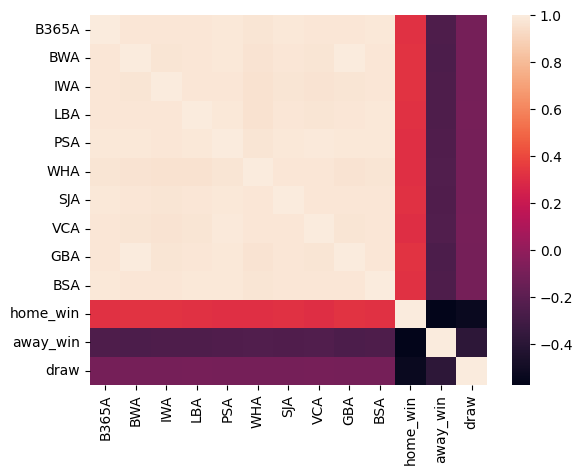

C:\Users\emile\AppData\Local\Temp\ipykernel_652\2197177453.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match_betting[['home_win', 'away_win', 'draw']] = match[['home_win', 'away_win', 'draw']]
C:\Users\emile\AppData\Local\Temp\ipykernel_652\2197177453.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match_betting[['home_win', 'away_win', 'draw']] = match[['home_win', 'away_win', 'draw']]
C:\Users\emile\AppData\Local\Temp\ipykernel_652\2197177453.py:17: SettingWithCopyWarning: 
A value is trying

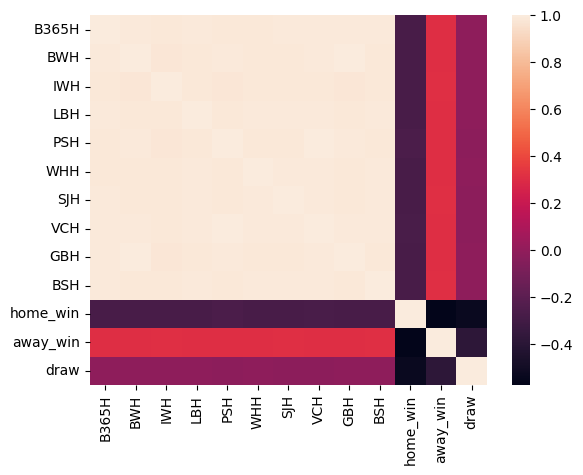

C:\Users\emile\AppData\Local\Temp\ipykernel_652\2197177453.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match_betting[['home_win', 'away_win', 'draw']] = match[['home_win', 'away_win', 'draw']]
C:\Users\emile\AppData\Local\Temp\ipykernel_652\2197177453.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match_betting[['home_win', 'away_win', 'draw']] = match[['home_win', 'away_win', 'draw']]
C:\Users\emile\AppData\Local\Temp\ipykernel_652\2197177453.py:27: SettingWithCopyWarning: 
A value is trying

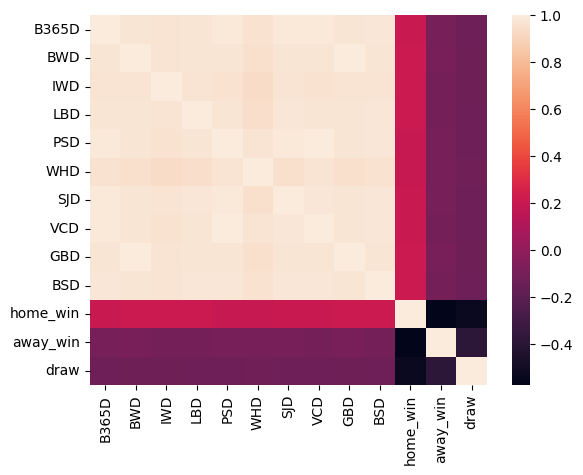

In [9]:
# Heatmap of all betting 

# Away odds
columns = match.columns.tolist()
selected_columns = [col for col in columns if col.endswith("A")]
match_betting = match[selected_columns]
match_betting[['home_win', 'away_win', 'draw']] = match[['home_win', 'away_win', 'draw']]
match_betting = match_betting.dropna()

ax = sns.heatmap(match_betting.corr())
plt.show()

# home odds
columns = match.columns.tolist()
selected_columns = [col for col in columns if col.endswith("H")]
match_betting = match[selected_columns]
match_betting[['home_win', 'away_win', 'draw']] = match[['home_win', 'away_win', 'draw']]
match_betting = match_betting.dropna()

ax = sns.heatmap(match_betting.corr())
plt.show()

# draw odds
columns = match.columns.tolist()
selected_columns = [col for col in columns if col.endswith("D")]
match_betting = match[selected_columns]
match_betting[['home_win', 'away_win', 'draw']] = match[['home_win', 'away_win', 'draw']]
match_betting = match_betting.dropna()

ax = sns.heatmap(match_betting.corr())
plt.show()

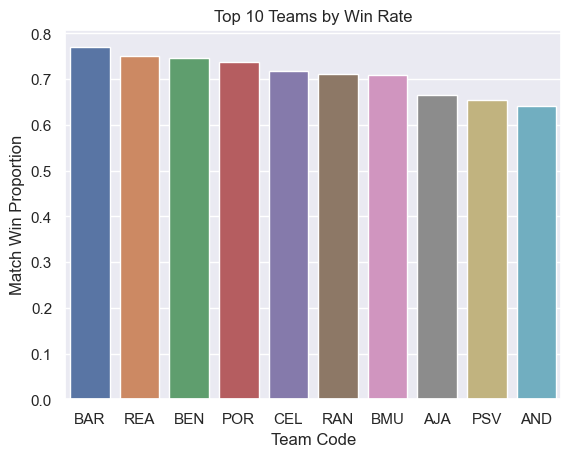

In [10]:
# Individual Team Success Factors
data_team['matches played'] = np.zeros(299, dtype=int)
data_team['wins'] = np.zeros(299, dtype=int)
data_team['win rate'] = np.zeros(299, dtype=float)
all_teams = data_team['team_api_id'].unique() # List of all team IDs
# Set number of wins and total matches played for each team
for t in all_teams:
    t_data = match.loc[data_match['home_team_api_id'] == t]
    total_matches = len(t_data)
    win_data = t_data.loc[t_data['home_team_goal'] > t_data['away_team_goal']]
    total_wins = len(win_data)
    t_data = match.loc[data_match['away_team_api_id'] == t]
    total_matches += len(t_data)
    win_data = t_data.loc[t_data['away_team_goal'] > t_data['home_team_goal']]
    total_wins += len(win_data)
    data_team.loc[data_team['team_api_id'] == t, 'matches played'] = total_matches
    data_team.loc[data_team['team_api_id'] == t, 'wins'] = total_wins
    data_team.loc[data_team['team_api_id'] == t, 'win rate'] = total_wins / total_matches
# Show top teams with win rate
data_team.sort_values(by=['win rate'], ascending=False, inplace=True)
sns.set_theme(style="darkgrid")
sns.barplot(x=data_team.head(10)['team_short_name'], y=data_team.head(10)['win rate'])
plt.title('Top 10 Teams by Win Rate')
plt.ylabel('Match Win Proportion', fontsize=12)
plt.xlabel('Team Code', fontsize=12)
plt.show()

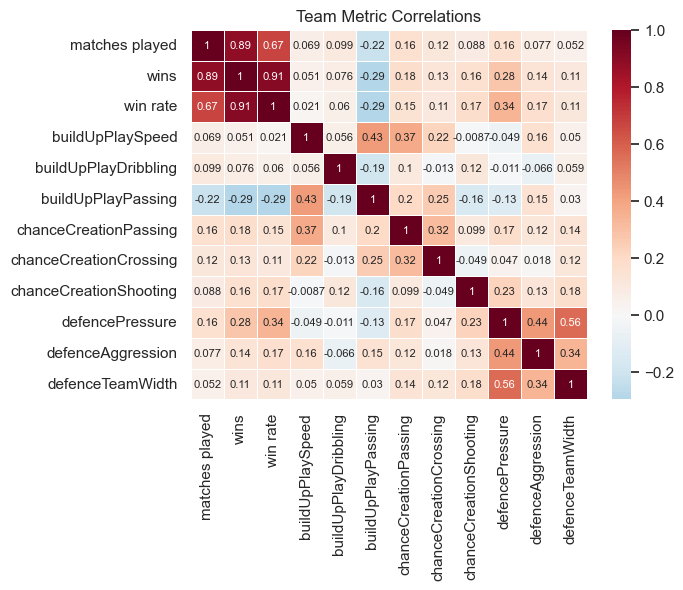

In [11]:
data_team['buildUpPlaySpeed'] = np.zeros(299, dtype=float)
data_team['buildUpPlayDribbling'] = np.zeros(299, dtype=float)
data_team['buildUpPlayPassing'] = np.zeros(299, dtype=float)
data_team['chanceCreationPassing'] = np.zeros(299, dtype=float)
data_team['chanceCreationCrossing'] = np.zeros(299, dtype=float)
data_team['chanceCreationShooting'] = np.zeros(299, dtype=float)
data_team['defencePressure'] = np.zeros(299, dtype=float)
data_team['defenceAggression'] = np.zeros(299, dtype=float)
data_team['defenceTeamWidth'] = np.zeros(299, dtype=float)
# Set average metrics for each team
for t in all_teams:
    t_data = data_team_att.loc[data_team_att['team_api_id'] == t]
    data_team.loc[data_team['team_api_id'] == t, 'buildUpPlaySpeed'] = t_data['buildUpPlaySpeed'].mean()
    data_team.loc[data_team['team_api_id'] == t, 'buildUpPlayDribbling'] = t_data['buildUpPlayDribbling'].mean()
    data_team.loc[data_team['team_api_id'] == t, 'buildUpPlayPassing'] = t_data['buildUpPlayPassing'].mean()
    data_team.loc[data_team['team_api_id'] == t, 'chanceCreationPassing'] = t_data['chanceCreationPassing'].mean()
    data_team.loc[data_team['team_api_id'] == t, 'chanceCreationCrossing'] = t_data['chanceCreationCrossing'].mean()
    data_team.loc[data_team['team_api_id'] == t, 'chanceCreationShooting'] = t_data['chanceCreationShooting'].mean()
    data_team.loc[data_team['team_api_id'] == t, 'defencePressure'] = t_data['defencePressure'].mean()
    data_team.loc[data_team['team_api_id'] == t, 'defenceAggression'] = t_data['defenceAggression'].mean()
    data_team.loc[data_team['team_api_id'] == t, 'defenceTeamWidth'] = t_data['defenceTeamWidth'].mean()
correlations = data_team[['matches played', 'wins', 'win rate', 'buildUpPlaySpeed', 'buildUpPlayDribbling',
                          'buildUpPlayPassing', 'chanceCreationPassing', 'chanceCreationCrossing', 'chanceCreationShooting',
                          'defencePressure', 'defenceAggression', 'defenceTeamWidth']].corr(method='pearson')
sns.heatmap(data=correlations,xticklabels=correlations.columns,yticklabels=correlations.columns,cmap='RdBu_r',annot=True,
            linewidth=0.5,center=0,annot_kws={'fontsize':8})
plt.title('Team Metric Correlations')
plt.show()

**Conclusions from Last Heatmap:** Most team strategy metrics don't have much impact on win rate (though building up play by passing seems to have a somewhat significant negative correlation and defensive pressure seems to have a somewhat significant positive correlation). Number of matches played, however, is reasonably highly correlated with win rate which could be useful in predicting future outcomes.

### Other Data Summary:

In [12]:
data_country

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


In [13]:
data_league

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


In [14]:
data_player

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154
...,...,...,...,...,...,...,...
11055,11071,26357,Zoumana Camara,2488,1979-04-03 00:00:00,182.88,168
11056,11072,111182,Zsolt Laczko,164680,1986-12-18 00:00:00,182.88,176
11057,11073,36491,Zsolt Low,111191,1979-04-29 00:00:00,180.34,154
11058,11074,35506,Zurab Khizanishvili,47058,1981-10-06 00:00:00,185.42,172


In [15]:
data_player_att

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,183974,102359,39902,2009-08-30 00:00:00,83.0,85.0,right,medium,low,84.0,...,88.0,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0
183974,183975,102359,39902,2009-02-22 00:00:00,78.0,80.0,right,medium,low,74.0,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183975,183976,102359,39902,2008-08-30 00:00:00,77.0,80.0,right,medium,low,74.0,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183976,183977,102359,39902,2007-08-30 00:00:00,78.0,81.0,right,medium,low,74.0,...,88.0,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0


In [16]:
data_team

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name,matches played,wins,win rate,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
258,43042,8634,241.0,FC Barcelona,BAR,304,234,0.769737,35.833333,35.0,34.000000,45.166667,33.333333,53.000000,64.333333,54.500000,66.500000
256,43040,8633,243.0,Real Madrid CF,REA,304,228,0.750000,50.666667,55.5,38.666667,67.500000,53.833333,69.000000,52.000000,52.166667,63.500000
216,35294,9772,234.0,SL Benfica,BEN,248,185,0.745968,59.000000,55.0,45.500000,63.833333,59.000000,55.333333,54.333333,51.500000,52.000000
205,35283,9773,236.0,FC Porto,POR,248,183,0.737903,51.000000,50.0,48.666667,55.666667,66.833333,66.166667,53.333333,50.333333,55.333333
242,39395,9925,78.0,Celtic,CEL,304,218,0.717105,61.333333,50.5,57.333333,55.666667,60.833333,60.833333,53.333333,54.333333,62.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,30222,6631,100626.0,FC Dordrecht,DOR,34,4,0.117647,39.000000,33.0,62.000000,62.000000,66.000000,48.000000,51.000000,58.000000,55.000000
104,15627,9912,159.0,DSC Arminia Bielefeld,BIE,34,4,0.117647,49.333333,49.0,59.333333,48.666667,51.333333,48.000000,39.666667,47.333333,49.333333
119,18079,8357,165.0,SpVgg Greuther Fürth,GRF,34,4,0.117647,59.833333,60.0,45.666667,50.666667,51.000000,50.833333,46.666667,52.833333,56.666667
282,47612,7869,1867.0,Córdoba CF,COR,38,3,0.078947,40.333333,46.5,46.333333,41.666667,59.000000,51.166667,36.833333,38.333333,48.666667


In [17]:
data_team_att

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,1454,15005,10000,2011-02-22 00:00:00,52,Balanced,NaN,Little,52,Mixed,...,53,Normal,Organised,46,Medium,48,Press,53,Normal,Cover
1454,1455,15005,10000,2012-02-22 00:00:00,54,Balanced,NaN,Little,51,Mixed,...,50,Normal,Organised,44,Medium,55,Press,53,Normal,Cover
1455,1456,15005,10000,2013-09-20 00:00:00,54,Balanced,NaN,Little,51,Mixed,...,32,Little,Organised,44,Medium,58,Press,37,Normal,Cover
1456,1457,15005,10000,2014-09-19 00:00:00,54,Balanced,42.0,Normal,51,Mixed,...,32,Little,Organised,44,Medium,58,Press,37,Normal,Cover
